In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
CPI = pd.read_csv('CPIAUCSL.csv')
eggs = pd.read_csv('APU0000708111.csv')
Gas = pd.read_csv('GasPrices.csv')

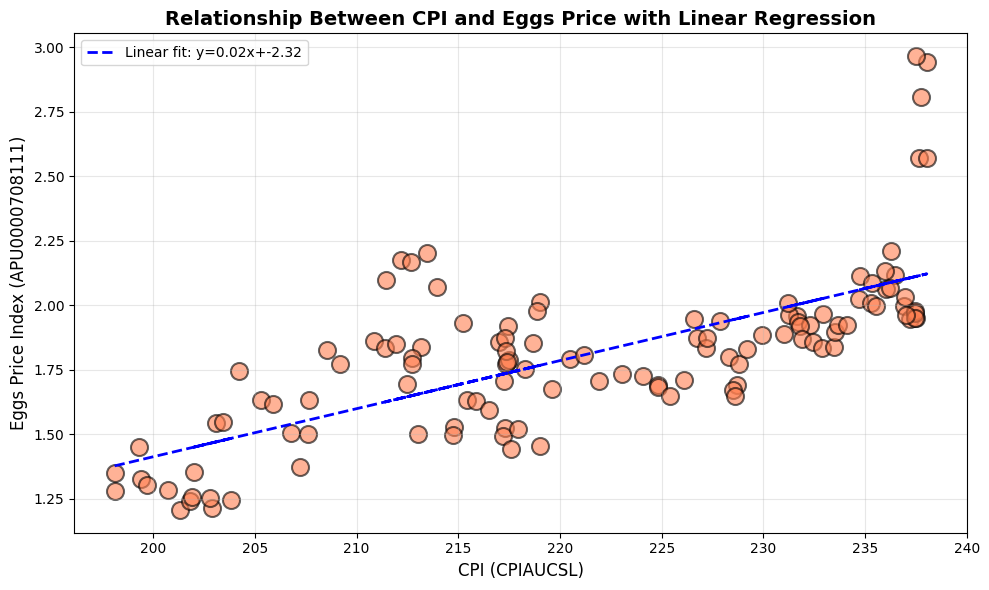

Linear regression equation: Eggs = 0.02 * CPI + -2.32
Correlation coefficient between CPI and Eggs: 0.71


In [44]:
import numpy as np

merged = pd.merge(CPI, eggs, on='observation_date')

# Remove any rows with NaN values
merged_clean = merged.dropna()

# Create a detailed scatter plot with linear regression line
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(merged_clean['CPIAUCSL'], merged_clean['APU0000708111'], s=150, alpha=0.6, c='coral', edgecolors='black', linewidth=1.5)

# Calculate and plot linear regression line
z = np.polyfit(merged_clean['CPIAUCSL'], merged_clean['APU0000708111'], 1)
p = np.poly1d(z)

# Add residuals to the dataframe
merged_clean['residual'] = merged_clean['APU0000708111'] - p(merged_clean['CPIAUCSL'])
plt.plot(merged_clean['CPIAUCSL'], p(merged_clean['CPIAUCSL']), "b--", linewidth=2, label=f'Linear fit: y={z[0]:.2f}x+{z[1]:.2f}')

plt.xlabel('CPI (CPIAUCSL)', fontsize=12)
plt.ylabel('Eggs Price Index (APU0000708111)', fontsize=12)
plt.title('Relationship Between CPI and Eggs Price with Linear Regression', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Linear regression equation: Eggs = {z[0]:.2f} * CPI + {z[1]:.2f}")
correlation = merged_clean['CPIAUCSL'].corr(merged_clean['APU0000708111'])
print(f"Correlation coefficient between CPI and Eggs: {correlation:.2f}")

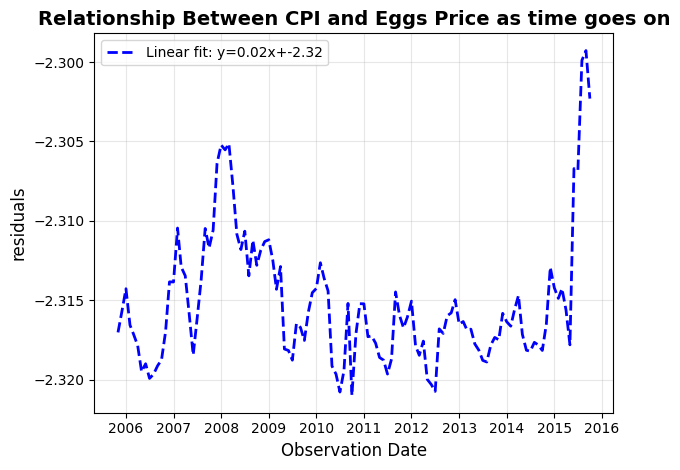

Linear regression equation: Eggs = 0.02 * CPI + -2.32
Correlation coefficient between CPI and Eggs: 0.71


In [45]:
plt.plot(merged_clean['observation_date'], p(merged_clean['residual']), "b--", linewidth=2, label=f'Linear fit: y={z[0]:.2f}x+{z[1]:.2f}')

plt.xlabel('Observation Date', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.title('Relationship Between CPI and Eggs Price as time goes on', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Linear regression equation: Eggs = {z[0]:.2f} * CPI + {z[1]:.2f}")
correlation = merged_clean['CPIAUCSL'].corr(merged_clean['APU0000708111'])
print(f"Correlation coefficient between CPI and Eggs: {correlation:.2f}")

In [46]:
from sklearn.linear_model import LinearRegression  # Fit a model (baseline or predictive)
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Merge CPI, eggs, and GDP on observation_date
merged_all = CPI.merge(eggs, on='observation_date', how='inner')
merged_all = merged_all.merge(Gas, on='observation_date', how='inner')

# Remove any rows with NaN values
merged_all = merged_all.dropna()

print(merged_all.head())
print(f"\nMerged dataset shape: {merged_all.shape}")

  observation_date  CPIAUCSL  APU0000708111  GASREGW
0       2005-11-01     198.1          1.279    2.257
1       2005-12-01     198.1          1.350    2.185
2       2006-01-01     199.3          1.449    2.316
3       2006-02-01     199.4          1.328    2.280
4       2006-03-01     199.7          1.302    2.425

Merged dataset shape: (120, 4)


In [48]:
X = merged_all[['CPIAUCSL']]
y = merged_all['APU0000708111']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, pred)

In [52]:
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mse)

print(f"Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"\nThe model explains {r2*100:.2f}% of the variance in egg prices.")

Model Accuracy Metrics:
Mean Absolute Error (MAE): 0.1571
Mean Squared Error (MSE): 0.0450
Root Mean Squared Error (RMSE): 0.2122
R² Score: 0.5754

The model explains 57.54% of the variance in egg prices.


# Now We see The Accuracy if we remove the last ten years of Data

In [ ]:
# Remove the last 10 years from the data
CPI['observation_date'] = pd.to_datetime(CPI['observation_date'])
eggs['observation_date'] = pd.to_datetime(eggs['observation_date'])
Gas['observation_date'] = pd.to_datetime(Gas['observation_date'])

# Calculate the cutoff date (10 years ago from the latest date)
latest_date = max(CPI['observation_date'].max(), eggs['observation_date'].max())
cutoff_date = latest_date - pd.DateOffset(years=10)

# Filter both dataframes
CPI = CPI[CPI['observation_date'] < cutoff_date]
eggs = eggs[eggs['observation_date'] < cutoff_date]

Model Accuracy Metrics:
Mean Absolute Error (MAE): 0.2859
Mean Squared Error (MSE): 0.2113
Root Mean Squared Error (RMSE): 0.4597
R² Score: 0.6026

The model explains 60.26% of the variance in egg prices.
